# Introduction to Altair (and working with Jupyter Notebooks)

This is an interactive tutorial to get you used to working with notebooks and to teach you a bit about visualizing data with Altair. 

Initially, you will be provided with code, and you just need to run the cell (Shift-Enter or see the Run menu for more options). Later, you will need to provide some code of your own.

---
We will start with some standard declarations to import the libraries we need. In addition to the `altair` library, we will be using `numpy` (numerical python) and `pandas` (python data analysis library) to help manage the data before we hand it off to Altair. Nothing will happen when you run the cell, but make sure you run it anyway (otherwise nothing else in the notebook will run).

*Incidentally, I am using the `import XYZ as X` abbreviations because they are fairly standard, even if I do think they are the product of lazy typists...*

In [1]:
import altair as alt
import numpy as np
import pandas as pd

Next, we'll create some random data using numpy.

In [2]:
x = np.random.randint(0,25,10)
y = np.random.randint(0,25,10)

print('x:',x)
print('y:',y)

x: [10  5 16  4 24 17  1  6 22  7]
y: [13 17 15 14  9 22  0 21  0  4]


Altair is designed to work best with Pandas DataFrames in "tidy" format, which is the long form that we talked about (every variable is a column, every observation is a row). [Pandas](http://pandas.pydata.org/pandas-docs/stable/) provides a lot of tools for manipulating data. You will pick some of it up as we go along, but I encourage you to consult the documentation when you find yourself needing to make changes to your data.   

*Note that putting the variable on its own means that it gets returned like it would be in the normal Python shell.*

In [3]:
df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,10,13
1,5,17
2,16,15
3,4,14
4,24,9
5,17,22
6,1,0
7,6,21
8,22,0
9,7,4


In this instance, we could print the whole DataFrame out, but usually you will want to just use df.head() so you don't get the entire data set. Change the number of random items from 10 to 100, and then use `df.head()` to see just the first five rows. *You can always make changes to cells and re-run them. Just be careful about the downstream cells. The state of the variables is based on execution order, not document order. So if, for example, you had reassigned x below, when you re-ran this cell, it would have the new value.*

One thing to note is that the DataFrame has added an extra column, called the `index`, which is basically just the row number in this case. While not imemdiately important, it can be good to know it is there. 

## Making a visualization
---

Okay, time to make a visualization. The process is very much like the one we described previously (though backwards): create a chart, set its mark type, and then configure the encodings. We will start by creating our chart and setting the mark to point.

In [4]:
alt.Chart(df).mark_point()

This is not very interesting because we didn't set any encodings. 

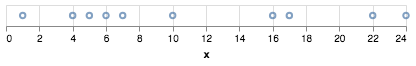

In [5]:
alt.Chart(df).mark_point().encode(x='x')

This said to assign our variable x to the x position. Now, we'll add y.

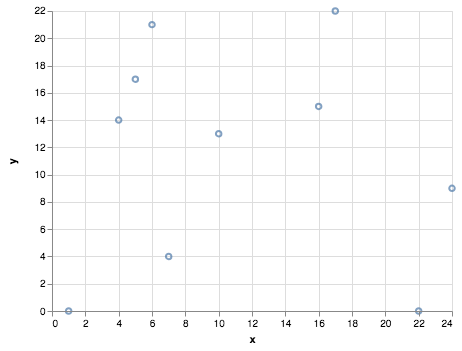

In [6]:
alt.Chart(df).mark_point().encode(x='x', y='y')

And we have a scatterplot. There are other encodings such as `size`, `color`, and `shape`, as well as other marks like `bar`, `tick`, and `line`.

In the cell below, I've added a third variable to our data. Create a new chart that maps `z` to the `size` encoding to create a bubble plot.

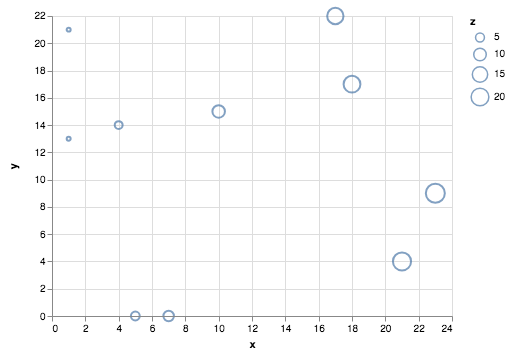

In [11]:
z = x = np.random.randint(0,25,10)

df = pd.DataFrame({'x':x, 'y':y, 'z':z})

alt.Chart(df).mark_point().encode(x='x', y='y' ,size='z')

Now try it again, mapping `z` to `color`.

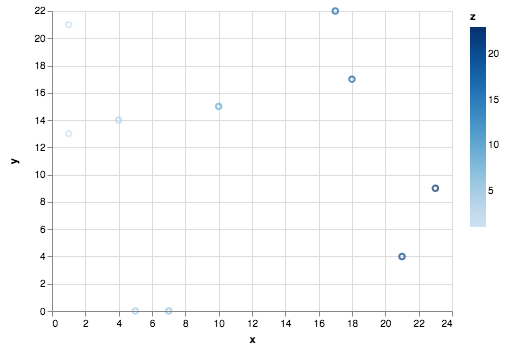

In [13]:
alt.Chart(df).mark_point().encode(x='x', y='y' ,color='z')

## Nominal data and aggregation
---

Now, we will make another dataset with some nominal data in it. Let's say happened to keep running into creatures from Doctor Who, and every time we counted how many of them we encountered.

In [14]:
types = ['Dalek', 'Cyberman', 'Ice Warrior']

observed_types = [types[i] for i in np.random.randint(0,len(types), 10)]
counts = np.random.randint(1,10,10)

df = pd.DataFrame({'type':observed_types, 'number':counts})
df

,type,number
0,Cyberman,9
1,Cyberman,1
2,Cyberman,1
3,Dalek,8
4,Ice Warrior,1
5,Cyberman,4
6,Ice Warrior,9
7,Ice Warrior,9
8,Ice Warrior,4
9,Dalek,6


Let's make a bar chart to look at the total number of each type of creature we encountered. 

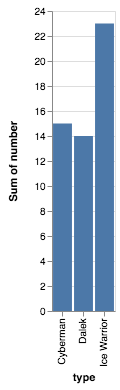

In [15]:
alt.Chart(df).mark_bar().encode(x='type:N', y='sum(number)')

Notice that I added some information to the encodings. First, I added `:N` to `type`. Altair typically can guess what kind of information you have, but we can be explicit and tell Altair that we have nominal (N), quantitative (Q), ordinal (O), or temporal (T) data. 

The other thing I added in was an **aggregation operator**: `sum()`. This aggregated the y values, grouped by the x values (in this case, it added up the counts for each type of creature).

The vertical bar chart doesn't look great. Flip the encodings to make this a horizontal bar chart. Also, let's see the average (use `average()`) of the counts instead of the sums. 

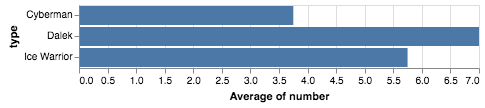

In [16]:
alt.Chart(df).mark_bar().encode(x='average(number)', y='type:N')

## Customizing
---

We can customize some of the visual attributes of our marks that we are not tying to an encoding.

*Altair uses [web colors](https://en.wikipedia.org/wiki/Web_colors)*

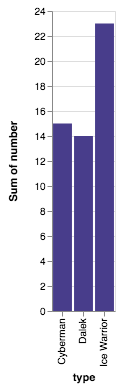

In [17]:
alt.Chart(df).mark_bar(color="darkslateblue").encode(x='type:N', y='sum(number)')

We have also been using the short form of the encodings, where we just pass a string. There is a long form, where we create an encoding object, which allows us to be more explicit, and to exert more control.

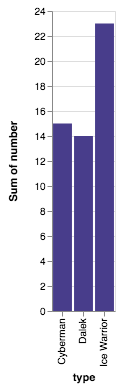

In [18]:
alt.Chart(df).mark_bar(color="darkslateblue").encode(
    x=alt.X('type', type="nominal"), 
    y=alt.Y('number', type="quantitative", aggregate="sum")
)

We can then specify attributes of the axis as well.

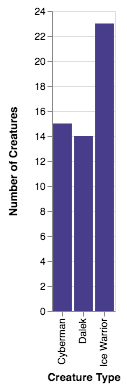

In [19]:
alt.Chart(df).mark_bar(color="darkslateblue").encode(
    x=alt.X('type', type="nominal", axis=alt.Axis(title="Creature Type")), 
    y=alt.Y('number', type="quantitative", aggregate="sum", axis=alt.Axis(title="Number of Creatures"))
)

And we can also set some basic properties on the chart itself.

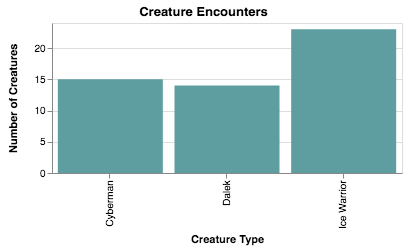

In [20]:
alt.Chart(df).mark_bar(color="cadetblue").encode(
    x=alt.X('type', type="nominal", axis=alt.Axis(title="Creature Type")), 
    y=alt.Y('number', type="quantitative", aggregate="sum", axis=alt.Axis(title="Number of Creatures"))
).properties(
    width=350,
    height=150,
    title="Creature Encounters"
)

## Importing data
---

We can use pandas to load in data in other formats. We will use it to pull in the Doctor Who episode data that we have been using as an example in class.

The `read_csv` command can also work locally. If this file was in the same directory as the notebook, we could just use `pd.read_csv('dr_who.csv')`. *How cool is it that we can just suck in data from the web?*

In [23]:
df = pd.read_csv("http://www.cs.middlebury.edu/~candrews/classes/cs465-f18/data/dr_who.csv")
df

,doctor,name,companions,start,end,episodes,duration
0,1,William Hartnell,10,1963,1966,140,3600
1,2,Patrick Troughton,5,1966,1969,127,3300
2,3,Jon Pertwee,3,1970,1974,129,3290
3,4,Tom Baker,8,1974,1981,198,4950
4,5,Peter Davidson,6,1982,1984,69,1790
5,6,Colin Baker,2,1985,1986,31,1035
6,7,Sylvester McCoy,2,1987,1989,42,1050
7,8,Paul McGann,1,1996,1996,1,89
8,9,Christopher Eccleston,3,2005,2005,13,585
9,10,David Tennant,5,2006,2010,48,2312


We will learn some more features of Altair shortly, but you are strongly encouraged to read through the [Altair Documentation](https://altair-viz.github.io/index.html) later, and look through the [Example Gallery](https://altair-viz.github.io/gallery/index.html) (particularly the Simple Charts, Bar Charts, Line Charts, and Scatter Plots).


## Your turn
---

The `df` DataFrame is all loaded up with Doctor Who data. You are going to create a couple of charts for me. Don't just give me the simplest defaults. Customize them a bit with good axis labels and titles, and think about orientation, sizing, and color as well.

Create a horizontal bar chart showing the total duration of each doctor (use the actor's name rather than the doctor number). *Challenge: order the bars by duration*

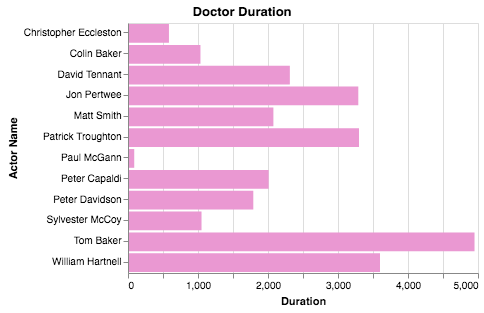

In [50]:
alt.Chart(df).mark_bar(color="#EA98D2").encode(
    x=alt.X('duration', type="quantitative", axis=alt.Axis(title="Duration"), aggregate="sum"), 
    y=alt.Y('name', type="nominal", axis=alt.Axis(title="Actor Name"))
).properties(
    width=350,
    height=250,
    title="Doctor Duration"
)

I said above Altair couldn't always guess what type your data was. The doctor variable is an example of this. Create a bar chart of doctor to episode, forcing `doctor` to be **nominal**.

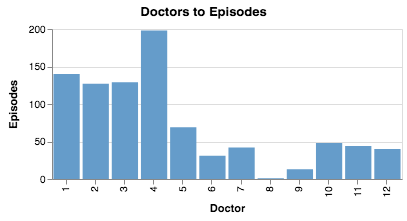

In [48]:
alt.Chart(df).mark_bar(color="#659CCA").encode(
    x=alt.X('doctor', type="nominal", axis=alt.Axis(title="Doctor")), 
    y=alt.Y('episodes', type="quantitative", axis=alt.Axis(title="Episodes"), aggregate="sum")
).properties(
    width=350,
    height=150,
    title="Doctors to Episodes"
)

Repeat your chart, but force it to be **quantitative**.

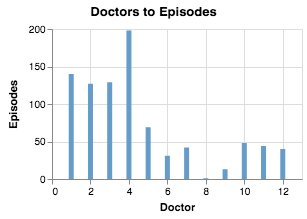

In [51]:
alt.Chart(df).mark_bar(color="#659CCA").encode(
    x=alt.X('doctor', type="quantitative", axis=alt.Axis(title="Doctor")), 
    y=alt.Y('episodes', type="quantitative", axis=alt.Axis(title="Episodes"),aggregate="sum")
).properties(
    width=250,
    height=150,
    title="Doctors to Episodes"
)

Which one should it be and why?

*It should be nominal because the doctor variable is the sequence of when the actors played the doctor. The variable is discrete and if it were type quantitative the scale would be continuous*

Graph the number of companions by start year as a line chart.

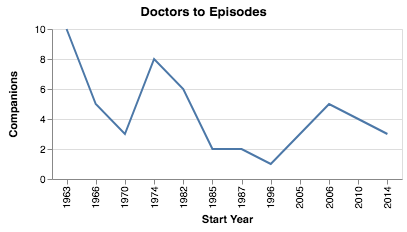

In [45]:
alt.Chart(df).mark_line().encode(
    x=alt.X('start', type="nominal", axis=alt.Axis(title="Start Year")), 
    y=alt.Y('companions', type="quantitative", axis=alt.Axis(title="Companions"))
).properties(
    width=350,
    height=150,
    title="Companions by Start Year"
)